In [1]:
df=pd.read_csv('C:/Users/abhishek/Downloads/car-mpg.csv')

In [2]:
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
df.isnull().sum()

mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
car_name    0
dtype: int64

In [4]:
df.shape

(398, 9)

In [5]:
df.drop('car_name',axis=1,inplace=True)

In [6]:
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [7]:
#outliers removal!-mpg is my target column!

In [8]:
df['mpg'].describe()

count    398.000000
mean      23.514573
std        7.815984
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

In [9]:
upper_limit=29+1.5*(29-17.5)   #upper whisker:  q3+1.5IQR   iqr=interquartile range
lower_limit=17.5-1.5*(29-17.5)   #lower whisker:  q1-1.5IQR   
print(upper_limit)
print(lower_limit)

46.25
0.25


In [10]:
df=df[df['mpg']<46.26]  #removing upper limit

as minimum value is 9 --> no need to remove lower outlier range

In [11]:
df['hp']

0      130
1      165
2      150
3      150
4      140
5      198
6      220
7      215
8      225
9      190
10     170
11     160
12     150
13     225
14      95
15      95
16      97
17      85
18      88
19      46
20      87
21      90
22      95
23     113
24      90
25     215
26     200
27     210
28     193
29      88
      ... 
368     88
369     88
370     85
371     84
372     90
373     92
374      ?
375     74
376     68
377     68
378     63
379     70
380     88
381     75
382     70
383     67
384     67
385     67
386    110
387     85
388     92
389    112
390     96
391     84
392     90
393     86
394     52
395     84
396     79
397     82
Name: hp, Length: 397, dtype: object

In [12]:
#treating the '?' in hp columns --> hp column is of type object!

import pandas as pd
import numpy as np
df['hp']=df['hp'].str.replace("?","")
df.loc[df['hp']=='', 'hp']=np.nan
df['hp'] = pd.to_numeric(df['hp'], errors='coerce')    #converting object to inetger
df['hp']=df['hp'].fillna(df['hp'].mean())
df['hp']

0      130.000000
1      165.000000
2      150.000000
3      150.000000
4      140.000000
5      198.000000
6      220.000000
7      215.000000
8      225.000000
9      190.000000
10     170.000000
11     160.000000
12     150.000000
13     225.000000
14      95.000000
15      95.000000
16      97.000000
17      85.000000
18      88.000000
19      46.000000
20      87.000000
21      90.000000
22      95.000000
23     113.000000
24      90.000000
25     215.000000
26     200.000000
27     210.000000
28     193.000000
29      88.000000
          ...    
368     88.000000
369     88.000000
370     85.000000
371     84.000000
372     90.000000
373     92.000000
374    104.570332
375     74.000000
376     68.000000
377     68.000000
378     63.000000
379     70.000000
380     88.000000
381     75.000000
382     70.000000
383     67.000000
384     67.000000
385     67.000000
386    110.000000
387     85.000000
388     92.000000
389    112.000000
390     96.000000
391     84.000000
392     90

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397 entries, 0 to 397
Data columns (total 8 columns):
mpg       397 non-null float64
cyl       397 non-null int64
disp      397 non-null float64
hp        397 non-null float64
wt        397 non-null int64
acc       397 non-null float64
yr        397 non-null int64
origin    397 non-null int64
dtypes: float64(4), int64(4)
memory usage: 27.9 KB


In [14]:
df['wt']=df['wt'].astype(float)
df['yr']=df['yr'].astype(float)
df['origin']=df['origin'].astype(float)
df['cyl']=df['cyl'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397 entries, 0 to 397
Data columns (total 8 columns):
mpg       397 non-null float64
cyl       397 non-null float64
disp      397 non-null float64
hp        397 non-null float64
wt        397 non-null float64
acc       397 non-null float64
yr        397 non-null float64
origin    397 non-null float64
dtypes: float64(8)
memory usage: 27.9 KB


In [15]:
##proceed with ols model to check assumptions-

In [16]:
X=df.drop('mpg',axis=1)   #x is storing all columns excpet mpg i.e my x values
y=df['mpg']   

In [17]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [18]:
## Raw OS Model
import statsmodels.api as sm

X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()


C:\Users\abhishek\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     260.3
Date:                Sun, 15 Dec 2019   Prob (F-statistic):          1.64e-142
Time:                        20:20:27   Log-Likelihood:                -1030.3
No. Observations:                 397   AIC:                             2077.
Df Residuals:                     389   BIC:                             2108.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -17.2142      4.502     -3.823      0.000     -26.066      -8.362
cyl           -0.4356      0.316     -1.378      0.169      -1.057       0.186
disp           0.0185      0.007      2.514      0.012       0.004       0.033
hp            -0.0111      0.013     -0.862      0.389      -0.037       0.014
wt            -0.0067      0.001    -10.618      0.000      -0.008      -0.005
acc            0.0943      0.094      0.999      0.318      -0.091       0.280
yr             0.7491      0.050     15.126      0.000       0.652       0.846
origin         1.3336      0.271      4.926      0.000       0.801       1.866
==============================================================================
Omnibus:                       23.572   Durbin-Watson:                   1.258
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.039
Skew:                           0.439   Prob(JB):                     2.46e-08
Kurtosis:                       4.160   Cond. No.                     8.50e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.5e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
#check assumptions of linear regression:-

For Linear Regression, we need to prove 5 major assumptions. Even if a single condition is not met we need to do transformation.
1) No Auto correlation. 
Test needed : Durbin- Watson Test.
    It's value ranges from 0-4. If the value of Durbin- Watson is Between 0-2, it's known as Positive Autocorrelation.
    If the value ranges from 2-4, it is known as Negative autocorrelation.
    If the value is exactly 2, it means No Autocorrelation.
For a good linear model, it should have low or no autocorrelation.

durbin watson = 1.258 --> positive auto correlation -->> transformation needed!

C:\Users\abhishek\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


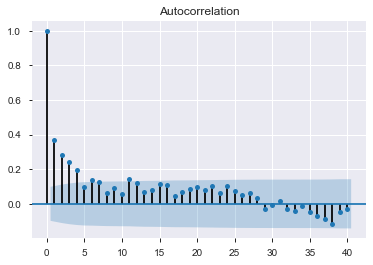

In [20]:
import statsmodels.tsa.api as smt

acf = smt.graphics.plot_acf(lin_reg.resid, lags=40 , alpha=0.05)
acf.show()

2) The second assumption is the Normality of Residuals. 
For this we prefer the Jarque Bera test. For a good model, the residuals should be normally distributed.
The higher the value of Jarque Bera test , the lesser the residuals are normally distributed.
We generally prefer a lower value of jarque bera test.

The Jarque–Bera test is a goodness-of-fit test of whether sample data 
have the skewness and kurtosis matching a normal distribution.
And jarque-bera test (test for normality) : 35
The jarque bera test tests whether the sample data has the skewness and kurtosis matching a normal distribution.
Note that this test generally works good for large enough number of data samples(>2000) as the test statistics asymptotically has a chi squared distribution with degrees 2 of freedom.

below 5.99 --> do transformation

Asssumption 3 - Linearity of residuals
Here we have 2 options. 
Either we can plot the observed values Vs predicted values and plot the Residual Vs predicted values and see the linearity of residuals. OR We can go for rainbow test. Let's look at rainbow test.

In [21]:
import statsmodels.api as sm
sm.stats.diagnostic.linear_rainbow(res=lin_reg, frac=0.5)  #transformation required

(1.6793082989959094, 0.00017105723550092926)

In [22]:
#linearity - mean of residuals should be zero --> here it is not zero as follows :-

In [23]:
lin_reg.resid.mean()   #mean of residuals not zero --> transformation required

-1.4393412294666815e-13

Assumption 4 - Homoscedasticity_test(using goldfeld test) OR (Beusch-Wagon Test)
Homoscedacity :: If the residuals are symmetrically distributed across the trend , then it is called as homoscedacious. Heteroscedacity :: If the residuals are not symmetric across the trend, then it is called as heteroscedacious. In this the residuals can form an arrow shape or any other non symmetrical shape.

This test is based on the hytpothesis testing where null and alternate hypothesis are:
H0 = constant variance among residuals. (Homoscedacity)
Ha = Heteroscedacity.
​
The residuals should be homoscedacious.

[('F statistic', 2.201400110700916), ('p-value', 3.887590941298903e-08)]

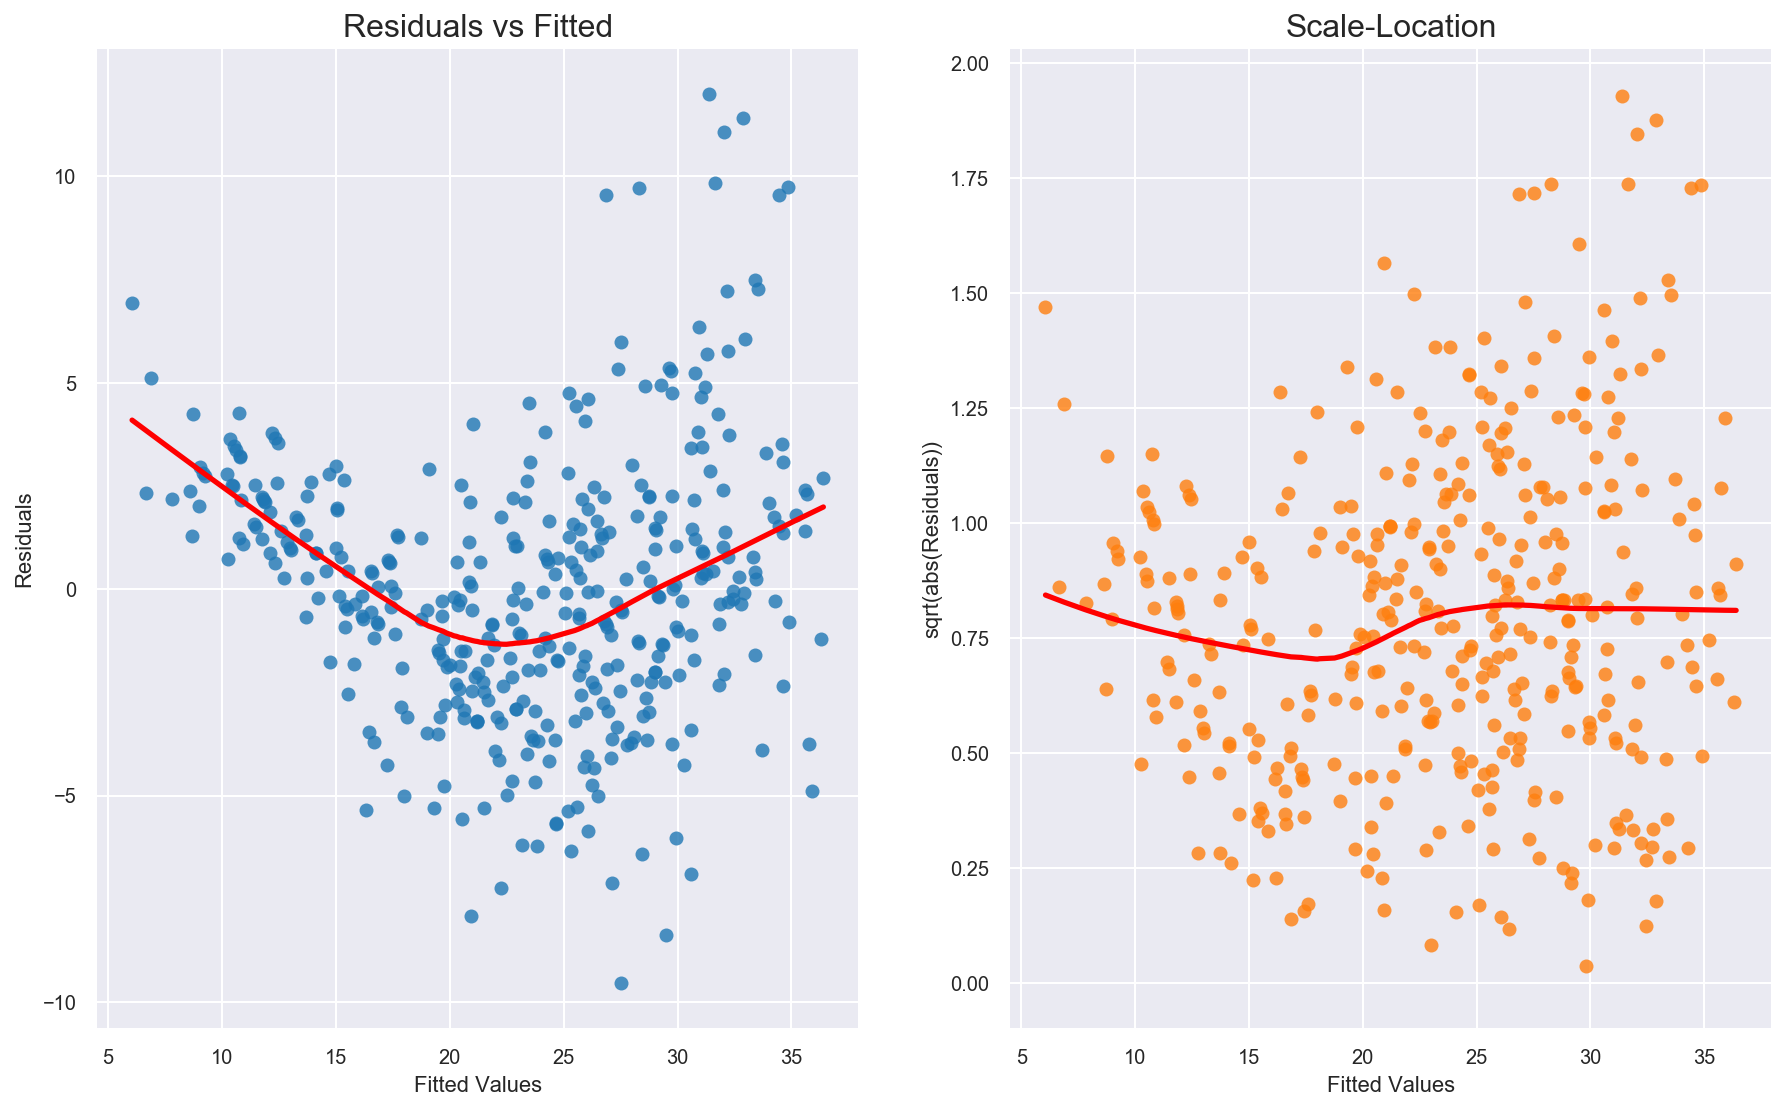

In [24]:
from statsmodels.compat import lzip
import numpy as np
from statsmodels.compat import lzip
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

model = lin_reg
fitted_vals = model.predict()
resids = model.resid
resids_standardized = model.get_influence().resid_studentized_internal
fig, ax = plt.subplots(1,2)

sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
ax[0].set_title('Residuals vs Fitted', fontsize=16)
ax[0].set(xlabel='Fitted Values', ylabel='Residuals')
sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
ax[1].set_title('Scale-Location', fontsize=16)
ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(model.resid, model.model.exog)
lzip(name, test)

Here, p value is less than 0.05 so, it is homoscedasticity distribution.
H0 = constant variance (Homoscedacity)
Ha = Heteroscedacity

Assumption 5- NO MULTI COLLINEARITY
The interpretation of VIF is as follows: the square root of a given variable’s VIF shows how much larger the standard error is,
compared with what it would be if that predictor were uncorrelated with the other features in the model.
If no features are correlated, then all values for VIF will be 1.


In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns).T

,cyl,disp,hp,wt,acc,yr,origin
vif,10.678183,21.744743,8.989303,10.480021,2.502475,1.237362,1.731108


Note : This vif column has be built with the help of X_constant and not the X_values.
    Because we built our model by adding Constant... multicolinearity exists
    
    all values above 2 should be discarded--> yr and origin should only be kept as others are collinear

As the regression assumptions were not met we will do transformation!
first we will construct the residual plot to see the plot:-

In [26]:
#residual plot
sns.set(style = 'whitegrid')

df['predictions'] = model.predict(X_constant)
residuals = model.resid
residuals

0      2.977184
1      0.881334
2      2.636497
3      0.781181
4      1.955149
5      4.257919
6      3.221618
7      3.191522
8      3.638843
9      1.751593
10    -0.400604
11    -0.220410
12     0.431983
13    -5.306846
14    -0.078264
15     2.919975
16    -1.470417
17     0.080898
18     1.570189
19    -1.100951
20     3.990157
21     1.745282
22     2.206089
23     2.621678
24     0.656963
25     2.177334
26     1.299843
27     2.389286
28     2.325631
29     0.821135
         ...   
368   -2.008320
369    3.411458
370    1.750368
371   -1.001531
372   -2.016395
373   -3.771148
374   -4.085600
375    1.533524
376    1.419250
377   -4.891606
378    5.769869
379    3.732149
380    1.356384
381    1.752729
382   -0.280616
383    2.309082
384   -3.756942
385    2.396323
386   -1.923630
387    9.710128
388   -3.758637
389   -6.419571
390    0.431868
391    5.245896
392   -0.513982
393   -1.263605
394    9.561387
395    0.876880
396   -1.356834
397    2.254320
Length: 397, dtype: floa

In [27]:
#residual plot
sns.set(style = 'whitegrid')

df['predictions'] = model.predict(X_constant)
residuals = model.resid
residuals

0      2.977184
1      0.881334
2      2.636497
3      0.781181
4      1.955149
5      4.257919
6      3.221618
7      3.191522
8      3.638843
9      1.751593
10    -0.400604
11    -0.220410
12     0.431983
13    -5.306846
14    -0.078264
15     2.919975
16    -1.470417
17     0.080898
18     1.570189
19    -1.100951
20     3.990157
21     1.745282
22     2.206089
23     2.621678
24     0.656963
25     2.177334
26     1.299843
27     2.389286
28     2.325631
29     0.821135
         ...   
368   -2.008320
369    3.411458
370    1.750368
371   -1.001531
372   -2.016395
373   -3.771148
374   -4.085600
375    1.533524
376    1.419250
377   -4.891606
378    5.769869
379    3.732149
380    1.356384
381    1.752729
382   -0.280616
383    2.309082
384   -3.756942
385    2.396323
386   -1.923630
387    9.710128
388   -3.758637
389   -6.419571
390    0.431868
391    5.245896
392   -0.513982
393   -1.263605
394    9.561387
395    0.876880
396   -1.356834
397    2.254320
Length: 397, dtype: floa

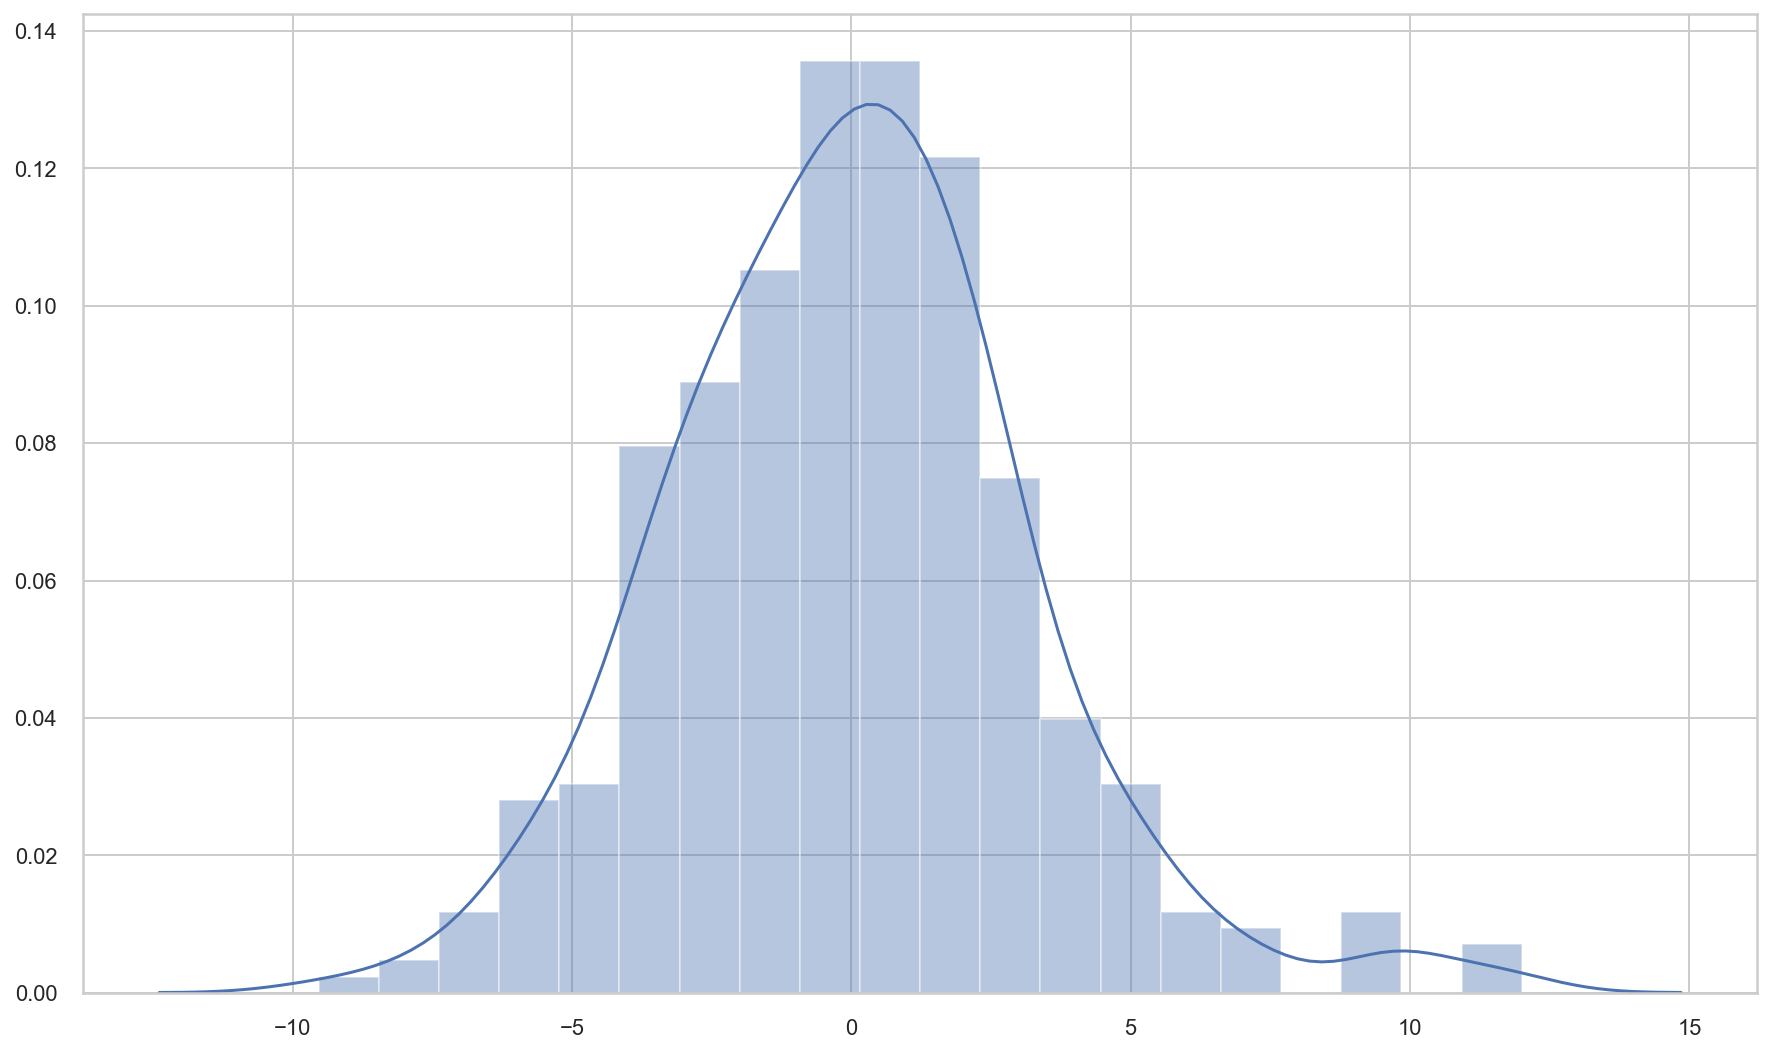

In [28]:
sns.set(style = 'whitegrid')
sns.distplot(residuals)  #plot is not normal 

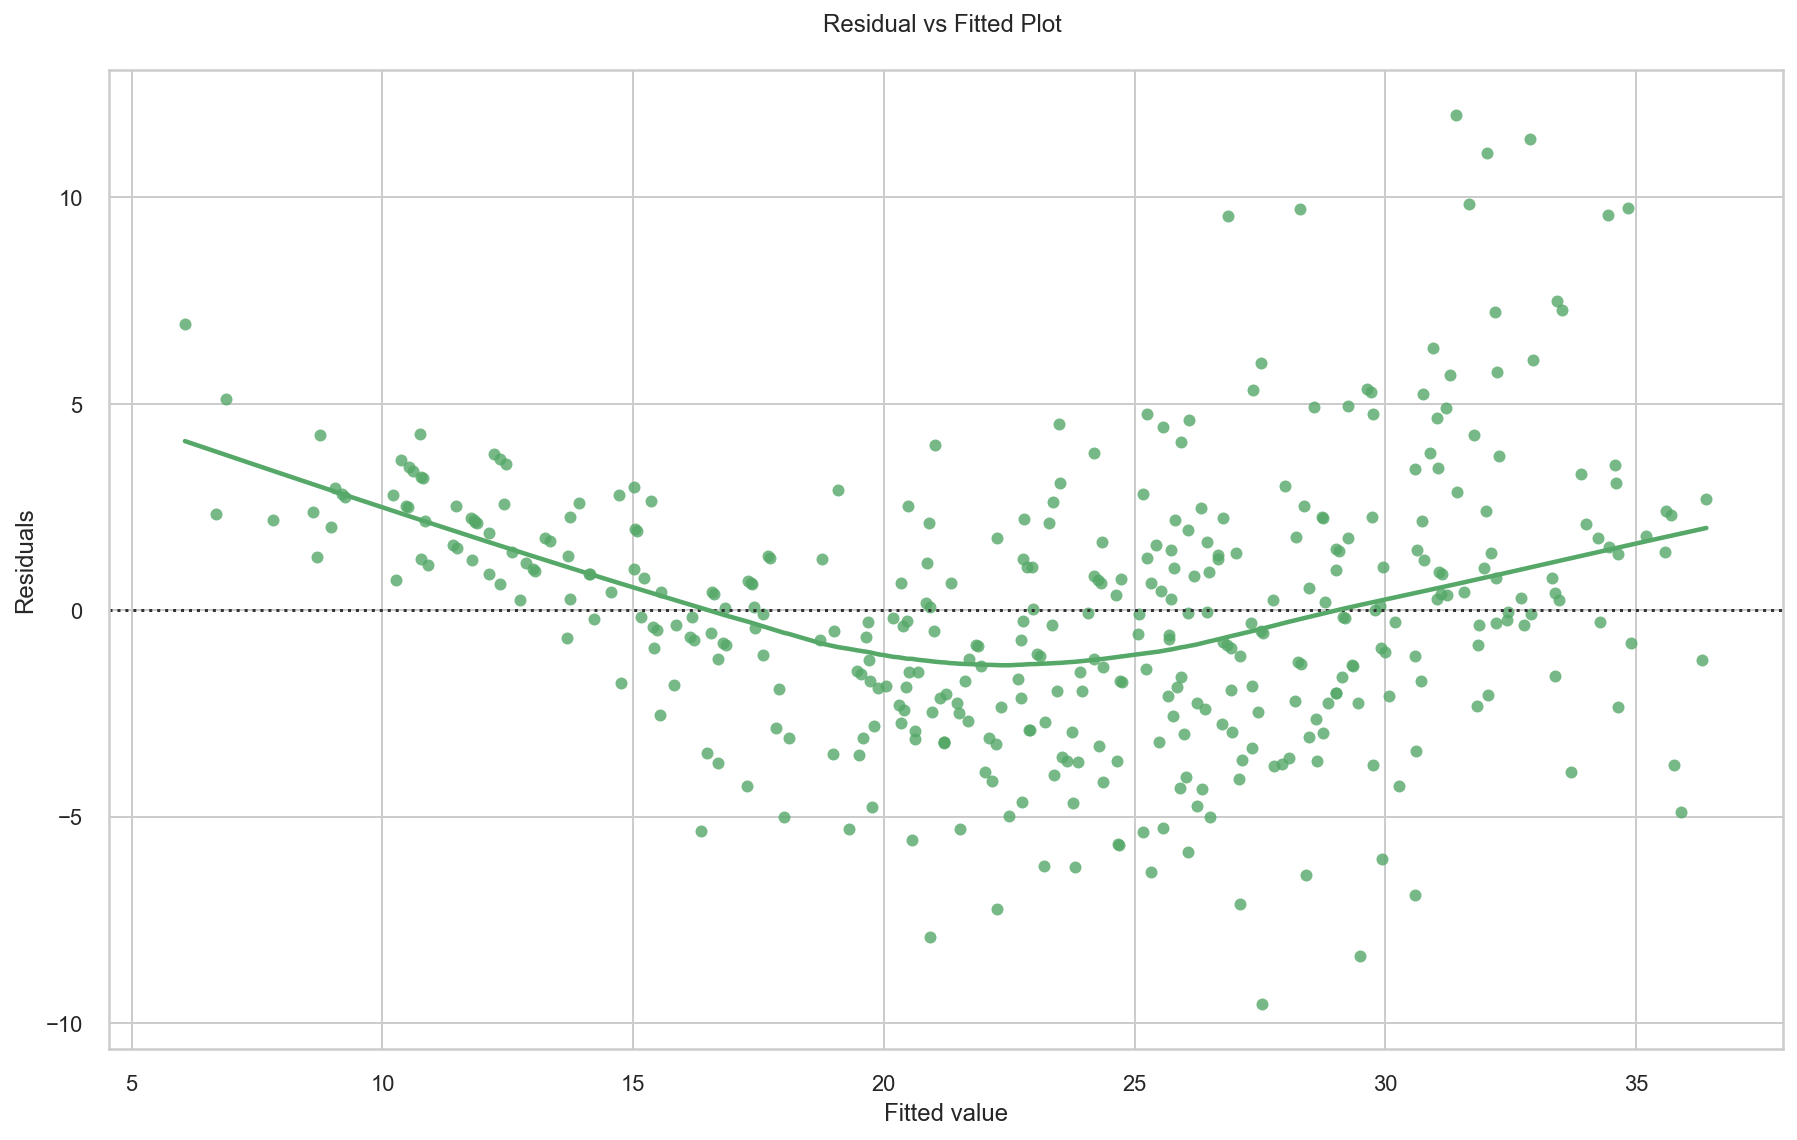

In [29]:
ax = sns.residplot(df.predictions, residuals, lowess = True, color = 'g')
ax.set(xlabel = 'Fitted value', ylabel = 'Residuals', title = 'Residual vs Fitted Plot \n')
plt.show()  

#as plot is quadratic we will go for sqrt transformation

for exponential go for log transform

In [30]:
df1 = df.transform(lambda x: x**0.5)
df1.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,predictions
0,4.242641,2.828427,17.521415,11.401754,59.194594,3.464102,8.3666,1.0,3.875928
1,3.872983,2.828427,18.708287,12.845233,60.770058,3.391165,8.3666,1.0,3.757481
2,4.242641,2.828427,17.832555,12.247449,58.617404,3.316625,8.3666,1.0,3.919630
3,4.000000,2.828427,17.435596,12.247449,58.591808,3.464102,8.3666,1.0,3.901130
4,4.123106,2.828427,17.378147,11.832160,58.728187,3.240370,8.3666,1.0,3.878769


In [31]:
X = df1.drop('mpg',axis=1)
y = df1.mpg
X_constant = sm.add_constant(X)
model = sm.OLS(y, X_constant).fit()
predictions = model.predict(X_constant)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     358.1
Date:                Sun, 15 Dec 2019   Prob (F-statistic):          6.08e-174
Time:                        20:20:31   Log-Likelihood:                -50.925
No. Observations:                 397   AIC:                             119.9
Df Residuals:                     388   BIC:                             155.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -5.5062      0.937     -5.876      0.000      -7.349      -3.664
cyl            -0.3643      0.139     -2.622      0.009      -0.637      -0.091
disp            0.0797      0.022      3.620      0.000       0.036       0.123
hp             -0.1089      0.026     -4.268      0.000      -0.159      -0.059
wt             -0.1460      0.014    -10.402      0.000      -0.174      -0.118
acc             0.0136      0.070      0.193      0.847      -0.125       0.152
yr              2.6446      0.222     11.887      0.000       2.207       3.082
origin          0.5288      0.079      6.730      0.000       0.374       0.683
predictions    -0.9861      0.151     -6.541      0.000      -1.283      -0.690
==============================================================================
Omnibus:                       14.829   Durbin-Watson:                   1.443
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               22.719
Skew:                           0.275   Prob(JB):                     1.17e-05
Kurtosis:                       4.035   Cond. No.                     3.99e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.99e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
#residual plot
sns.set(style = 'whitegrid')

df1['predictions'] = model.predict(X_constant)
residuals = model.resid
residuals

0      0.384892
1      0.192056
2      0.413078
3      0.178080
4      0.261422
5      0.442508
6      0.368744
7      0.335758
8      0.397857
9      0.288489
10     0.154568
11    -0.019666
12     0.168018
13    -0.044398
14     0.200974
15     0.396935
16    -0.080029
17     0.083017
18     0.282986
19    -0.261983
20     0.548807
21     0.263944
22     0.373939
23     0.359687
24     0.141161
25    -0.248181
26    -0.300575
27    -0.138645
28    -0.465001
29     0.198206
         ...   
368   -0.115267
369    0.306770
370    0.171835
371   -0.103033
372   -0.104141
373   -0.286863
374   -0.199844
375   -0.109616
376   -0.015931
377   -0.594137
378    0.245074
379    0.153964
380    0.055817
381    0.062955
382   -0.081347
383   -0.024502
384   -0.527830
385    0.015431
386   -0.025231
387    1.004080
388   -0.344785
389   -0.472302
390    0.163646
391    0.355810
392    0.051996
393   -0.080039
394    0.628737
395   -0.065245
396   -0.092699
397    0.282380
Length: 397, dtype: floa

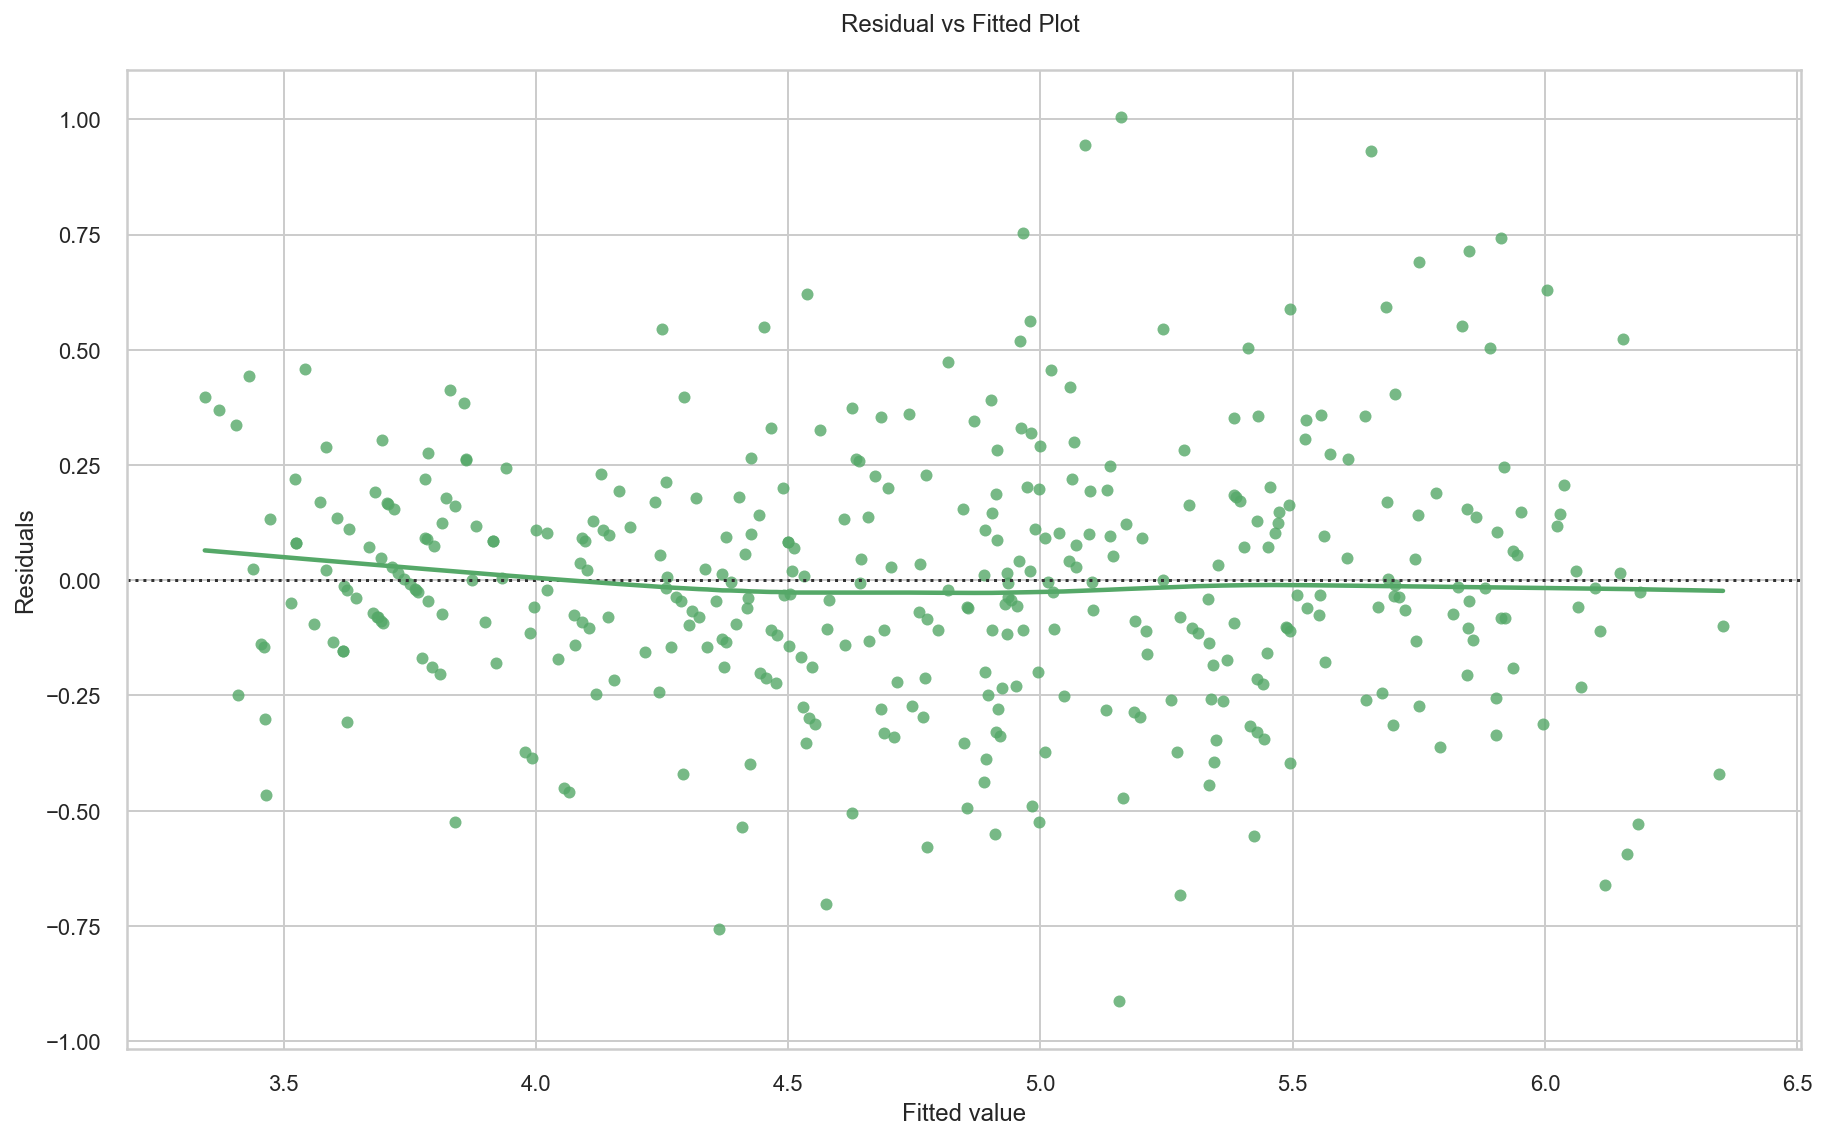

In [33]:
ax = sns.residplot(df1.predictions, residuals, lowess = True, color = 'g')
ax.set(xlabel = 'Fitted value', ylabel = 'Residuals', title = 'Residual vs Fitted Plot \n')
plt.show()

as above plot is random transformation is done

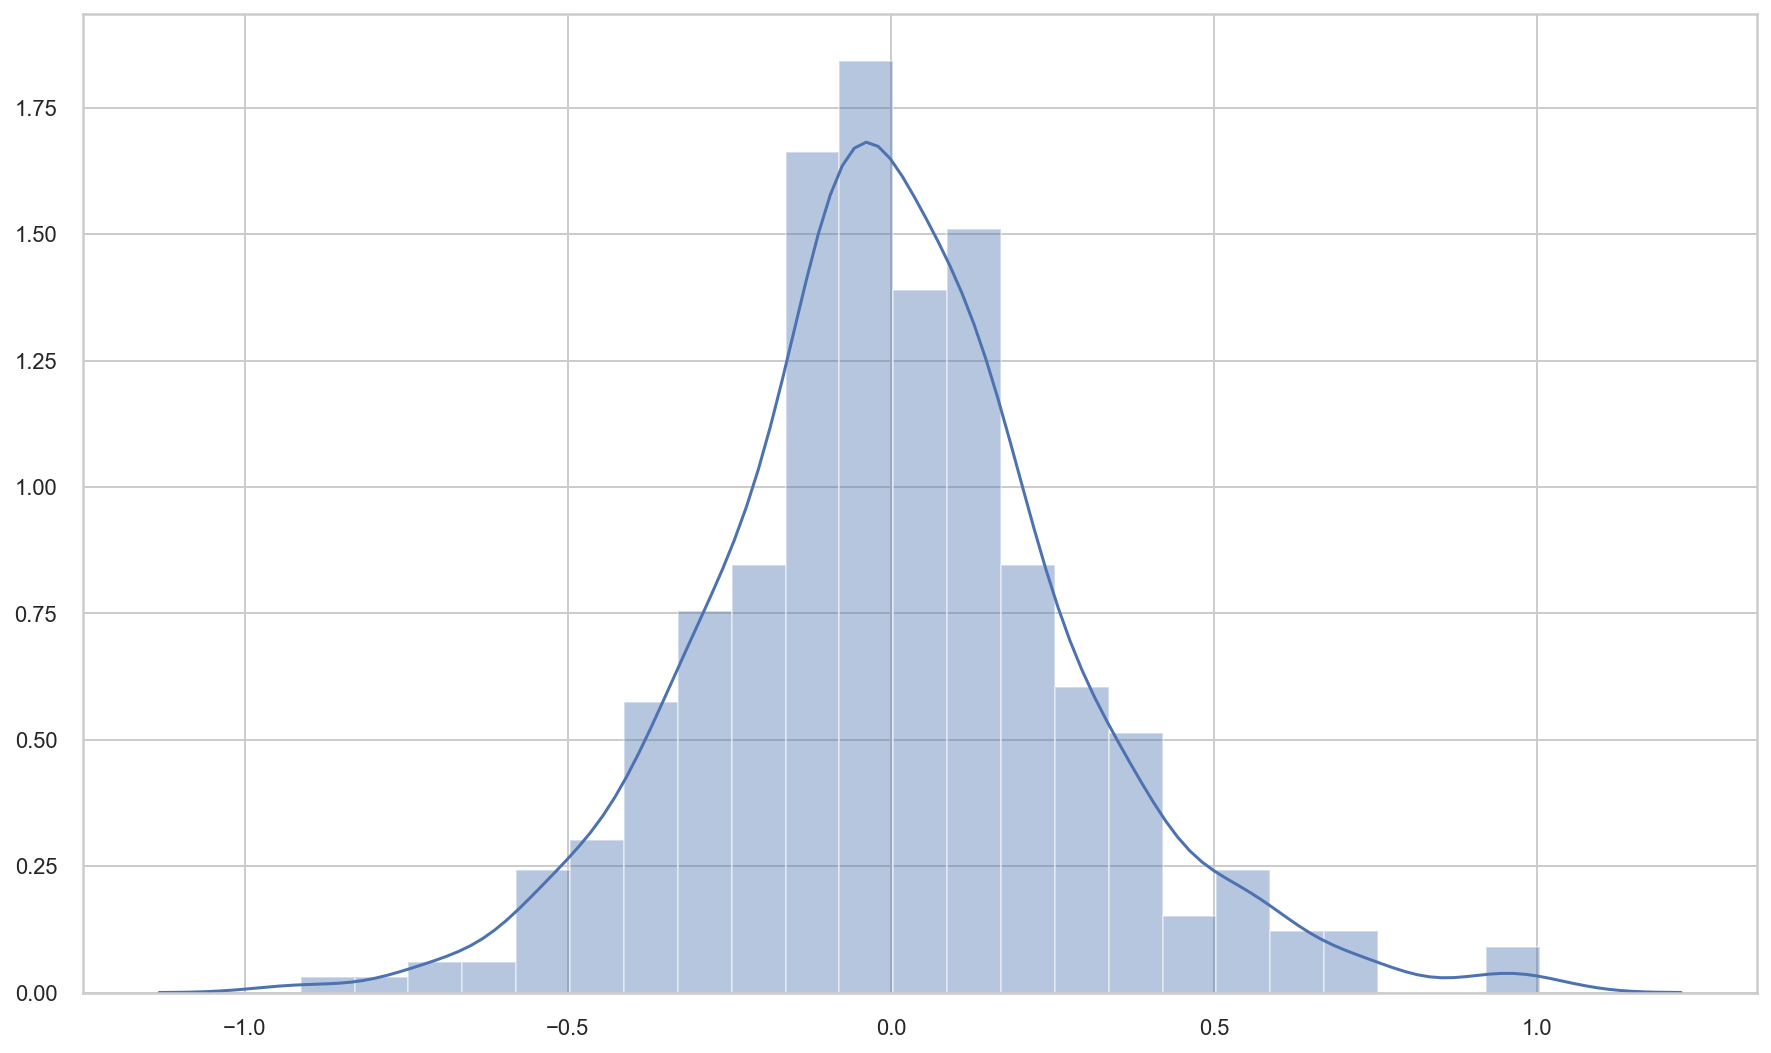

In [34]:
sns.set(style = 'whitegrid')
sns.distplot(residuals)

In [35]:
#plot is normal! -- hence we know that we can do sqrt transformation on my original df!

In [36]:
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,predictions
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,15.022816
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,14.118666
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,15.363503
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,15.218819
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,15.044851


In [37]:
df.drop('predictions',axis=1,inplace=True)

In [38]:
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0


In [39]:
df=df.transform(lambda x:x**0.5)  #sqrt transformation

In [40]:
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,4.242641,2.828427,17.521415,11.401754,59.194594,3.464102,8.3666,1.0
1,3.872983,2.828427,18.708287,12.845233,60.770058,3.391165,8.3666,1.0
2,4.242641,2.828427,17.832555,12.247449,58.617404,3.316625,8.3666,1.0
3,4.000000,2.828427,17.435596,12.247449,58.591808,3.464102,8.3666,1.0
4,4.123106,2.828427,17.378147,11.832160,58.728187,3.240370,8.3666,1.0


In [41]:
X=df.drop('mpg',axis=1)
y=df['mpg']

now lets do feature selection!

1.Using Pearson Correlation
In this method, filtering is done using correlation matrix and it is commonly done using Pearson correlation.
​
The correlation coefficient has values between -1 to 1
— A value closer to 0 implies weaker correlation (exact 0 implying no correlation)
— A value closer to 1 implies stronger positive correlation
— A value closer to -1 implies stronger negative correlation


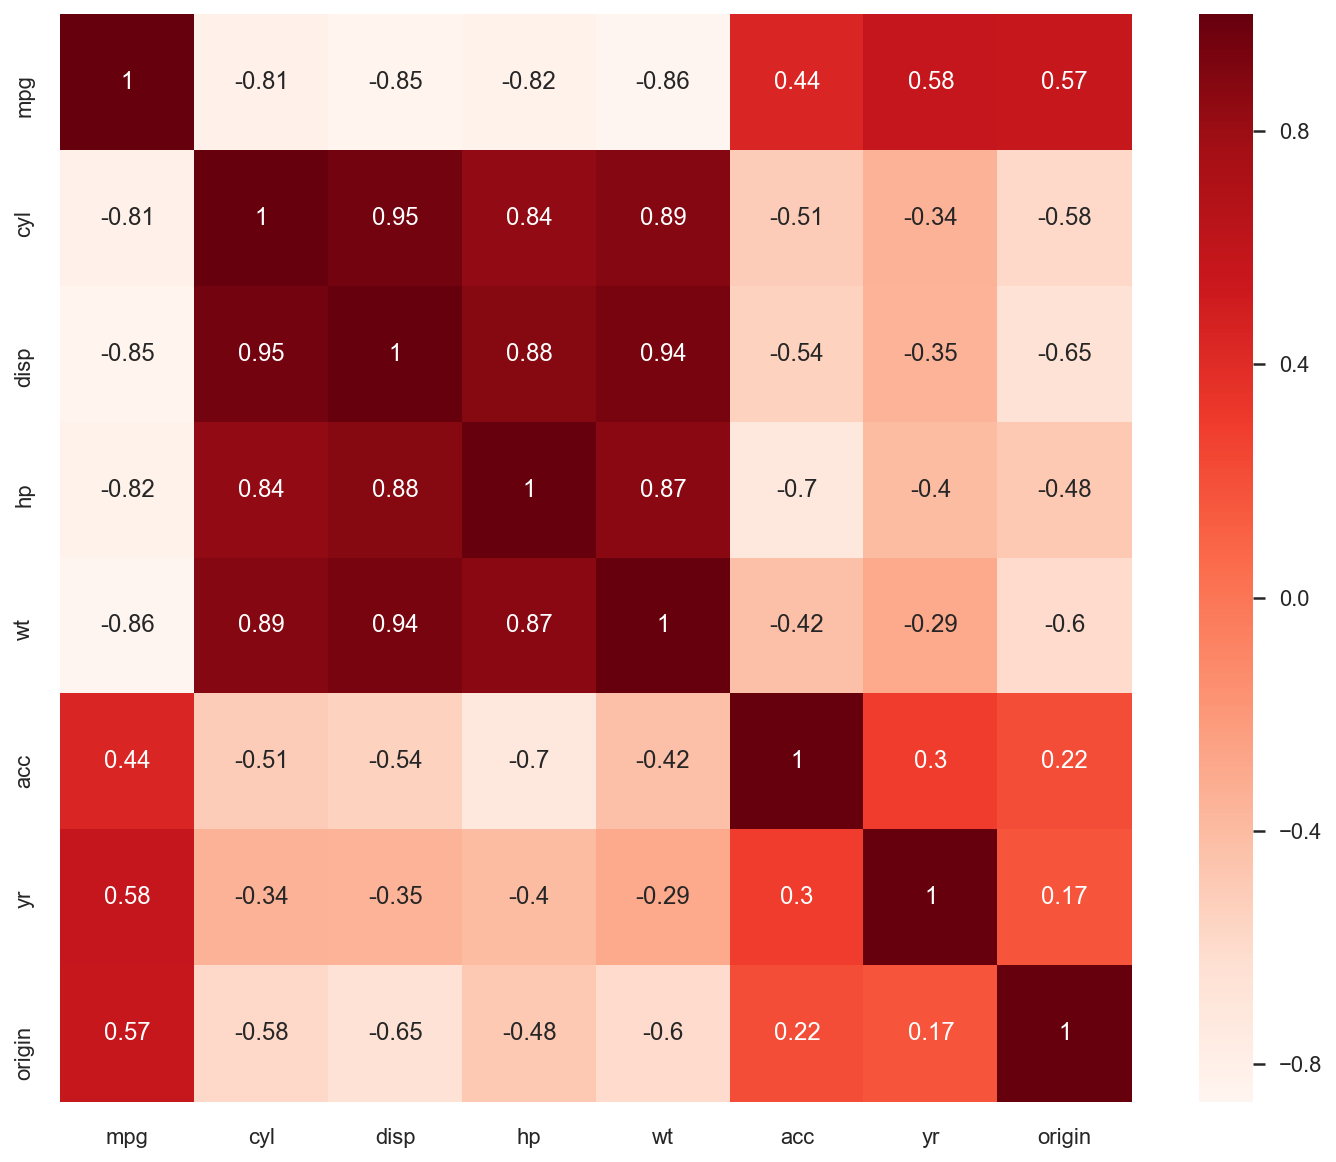

In [42]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [43]:
#Correlation with output variable
cor_target = abs(cor["mpg"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

mpg       1.000000
cyl       0.806052
disp      0.846529
hp        0.820315
wt        0.863829
yr        0.576749
origin    0.566314
Name: mpg, dtype: float64

In [44]:
#except yr and origin all other values are highly related and effects mpg

2.Wrapper method
A wrapper method needs one machine learning algorithm and uses its performance as evaluation criteria.
Feed the features to the selected Machine Learning algorithm and based on the model performance you add/remove the features.
It is an iterative and computationally expensive process but it is more accurate than the filter method.
Forward Selection: Forward selection is an iterative method in which we start with having no feature in the model. In each iteration, we keep adding the feature which best improves our model till an addition of a new variable does not improve the performance of the model.

Backward Elimination: In backward elimination, we start with all the features and removes the least significant feature at each iteration which improves the performance of the model. We repeat this until no improvement is observed on removal of features.

Recursive Feature elimination: It is a greedy optimization algorithm which aims to find the best performing feature subset. It repeatedly creates models and keeps aside the best or the worst performing feature at each iteration. It constructs the next model with the left features until all the features are exhausted. It then ranks the features based on the order of their elimination.

# 2.backward elimination:-

In [45]:
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X)
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.pvalues

const     1.080505e-02
cyl       5.285509e-01
disp      4.139315e-01
hp        6.686207e-03
wt        8.801093e-19
acc       3.039468e-01
yr        1.499037e-46
origin    3.933405e-04
dtype: float64

In [46]:
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['hp', 'wt', 'yr', 'origin']


['hp', 'wt', 'yr', 'origin'] -- are final set of variables !

# 3.RFE - Recursive Feature Elimination

RFE method works by recursively removing attributes and building a model on those attributes that remain. 
It uses accuracy metric to rank the feature according to their importance. 
The RFE method takes the model to be used and the number of required features as input. 
It then gives the ranking of all the variables, 1 being most important. 
It also gives its support, True being relevant feature and False being irrelevant feature.

In [47]:
from sklearn.feature_selection import RFE
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 4)   
#4=no of features i want to select or no of attributes i want...hence getting 4 1's as those are most significant
#it does on the basis of ranking ! i selected 4 as by backward elimination also got 4 features so i want to check

In [48]:
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 4)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['hp', 'acc', 'yr', 'origin'], dtype='object')


Index(['hp', 'acc', 'yr', 'origin'], dtype='object') - are final set of vaiables

# 4 step forward selection

In [49]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as acc
from mlxtend.feature_selection import SequentialFeatureSelector as sfs


In [50]:
# Build RF classifier to use in feature selection
clf = LinearRegression()

#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)


# Build step forward feature selection
sfs1 = sfs(clf,k_features = 7,forward=True,
           floating=False, scoring='r2',
           verbose=2,
           cv=5)

# Perform SFFS
sfs1 = sfs1.fit(X, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished

[2019-12-15 20:20:35] Features: 1/7 -- score: 0.36981675742091724[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s finished

[2019-12-15 20:20:35] Features: 2/7 -- score: 0.6928227221758995[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished

[2019-12-15 20:20:35] Features: 3/7 -- score: 0.6975125061010161[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1

In [51]:
#using 7 features r square is 0.67

In [52]:
#using 6 features r2 is .68

In [53]:
# Which features?
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[0, 1, 2, 3, 4, 5, 6]


In [54]:
X.columns #-- the most imp feaures are in order like this-->

Index(['cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'origin'], dtype='object')

# 5 - embedded methods

. Embedded method
Embedded methods are iterative in a sense that takes care of each iteration of the model training process and carefully extract those features which contribute the most to the training for a particular iteration.
Regularization methods are the most commonly used embedded methods which penalize a feature given a coefficient threshold.
Lasso regression performs L1 regularization which adds penalty equivalent to absolute value of the magnitude of coefficients.
Ridge regression performs L2 regularization which adds penalty equivalent to square of the magnitude of coefficients.
reg = LassoCV()

In [55]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 0.005253
Best score using built-in LassoCV: 0.865030


C:\Users\abhishek\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Text(0.5, 1.0, 'Feature importance using Lasso Model')

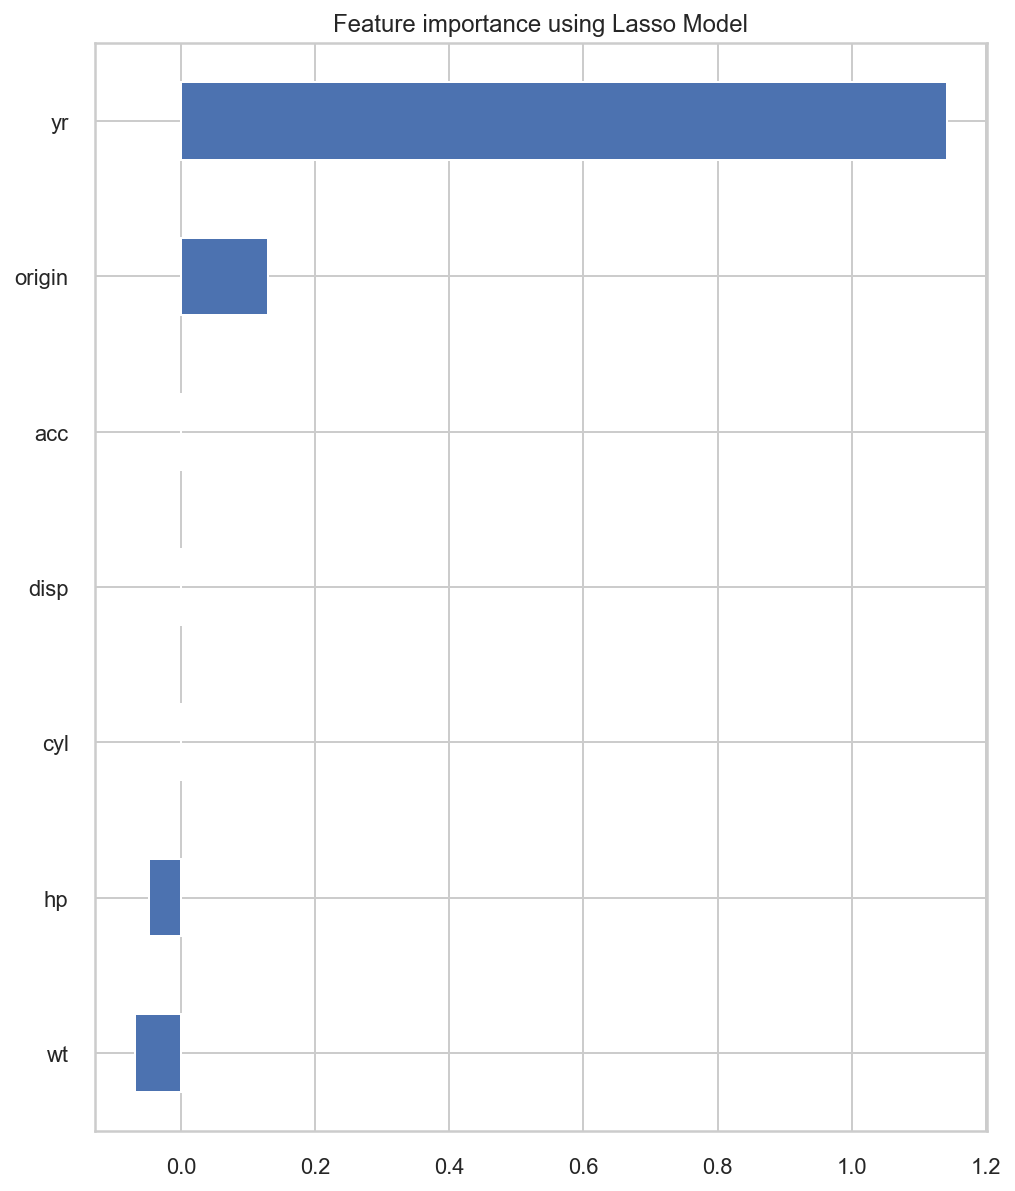

In [56]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

#as we see --> yr origin acc disp cyl hp wt are the most important features from high to low

#observing all the above methods we can conclude that -->>
hp wt yr and origin are common factors in all the above models -> hence we will go forward with these variables to build our model!

In [57]:
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,4.242641,2.828427,17.521415,11.401754,59.194594,3.464102,8.3666,1.0
1,3.872983,2.828427,18.708287,12.845233,60.770058,3.391165,8.3666,1.0
2,4.242641,2.828427,17.832555,12.247449,58.617404,3.316625,8.3666,1.0
3,4.000000,2.828427,17.435596,12.247449,58.591808,3.464102,8.3666,1.0
4,4.123106,2.828427,17.378147,11.832160,58.728187,3.240370,8.3666,1.0


In [58]:
df.drop('cyl',axis=1,inplace=True)
df.drop('disp',axis=1,inplace=True)
df.drop('acc',axis=1,inplace=True)

In [59]:
df.head()

,mpg,hp,wt,yr,origin
0,4.242641,11.401754,59.194594,8.3666,1.0
1,3.872983,12.845233,60.770058,8.3666,1.0
2,4.242641,12.247449,58.617404,8.3666,1.0
3,4.000000,12.247449,58.591808,8.3666,1.0
4,4.123106,11.832160,58.728187,8.3666,1.0


In [60]:
x=df.drop('mpg',axis=1)
y=df['mpg']

In [61]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=12) 
#random state 

In [62]:
#scaling train and test!
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  #now we want to scale the values of train data

sc.fit_transform(xtrain)
pd.DataFrame(sc.fit_transform(xtrain))
xtrain_scaled=pd.DataFrame(sc.fit_transform(xtrain),columns = xtrain.columns)  #scaled data


sc.transform(xtest) 
xtest_scaled = pd.DataFrame(sc.transform(xtest),columns = xtest.columns)


In [63]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
pred=lin_reg.fit(xtrain_scaled,ytrain)

In [64]:
print(f'coeeficients:{lin_reg.coef_}')     #all 13 coefficients i.e b1(or beta 1) values of all 13 x variables 
print(f'intercept:{lin_reg.intercept_}')   #y intercept only one i.e beta0,(b0)
print(f'R^2 score:{lin_reg.score(xtrain_scaled,ytrain)}')    #r^2 rsquare value
##training accuracy is 0.86

coeeficients:[-0.07986992 -0.49905857  0.26441983  0.07436002]
intercept:4.78726675310007
R^2 score:0.8620448469837717


In [65]:
#testing accuracy is .88
print(f'R^2 score for test: {lin_reg.score(xtest_scaled,ytest)}')  



R^2 score for test: 0.8856220815257068


In [66]:
pred=lin_reg.fit(xtrain_scaled,ytrain).predict(xtest_scaled)

In [67]:
pred   #predicted values of y as per model!

array([5.58335755, 5.10736219, 4.87066864, 3.70988495, 4.11305788,
       4.53481583, 3.37155053, 5.07726272, 5.48478908, 3.92318926,
       3.24900754, 3.61968324, 4.71554174, 5.00958032, 5.65469088,
       4.60504171, 5.30984007, 5.2891369 , 4.30112134, 5.57763623,
       3.91951561, 4.76437024, 5.10466642, 5.22850079, 6.16027957,
       6.04487636, 4.99438727, 3.97097141, 3.9753644 , 4.28260993,
       4.13641935, 3.27944472, 5.76246779, 5.04213583, 5.73750977,
       5.39488685, 3.877528  , 4.40879096, 5.86751387, 5.01411786,
       3.70003826, 4.13528514, 5.90221208, 4.82232798, 4.45584111,
       3.90232805, 4.68216892, 5.03552421, 4.16556618, 5.51421781,
       5.38058735, 5.83666794, 5.46194498, 4.65474538, 4.31741886,
       5.19598696, 4.58607784, 4.9022221 , 4.86179242, 4.74451466,
       5.00142497, 5.92693513, 5.11192233, 5.77403534, 3.73960045,
       4.70982089, 3.12861246, 3.70210237, 4.44643371, 3.4756851 ,
       4.0386239 , 4.49796296, 4.43089965, 4.39520879, 3.81276

In [68]:
from sklearn.metrics import mean_squared_error

from math import sqrt

rmse = sqrt(mean_squared_error(ytest, pred ))

print(rmse)  #root mean squared error! 

0.26251613123916856


In [97]:
from sklearn.metrics import mean_absolute_error

mae=mean_absolute_error(ytest,pred)

print(mae)

0.2030056395224769


In [110]:
#mape=((sum(abs((ytest-pred) / (ytest)))/317)*100
#print(mape)

SyntaxError: invalid syntax (<ipython-input-110-e871f5cd7c6e>, line 2)

In [99]:
xtrain_scaled.shape

(317, 4)

In [70]:
#r--- 
#from sklearn.metrics import r2_score  #test accuracy!

#print("R^2 score for test: ",r2_score(y_true=ytest, y_pred=pred))

both train and test accuracy are almost same and train model accuracy < test model accuracy ->hence model fits. 0.86 and 0.88

However for our use case now we will consider that model was overfitting i.e train model accuracy is greater than test model accuracy -->when train accuracy is greater than testing acccuracy we proceed with regularisation !

# There are 3 regularisation techniques-- ridge , lasso, elastic net

In [71]:
#the linear regression scores are as follows as already established --
train_score=lin_reg.score(xtrain_scaled, ytrain)
test_score=lin_reg.score(xtest_scaled, ytest)
print(train_score)
print(test_score)

0.8620448469837717
0.8856220815257068


# ridge - for few variables effecting target , we generally may use ridge

for our study we are proceeding with ridge, lasso and elastic fit

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [73]:
# higher the alpha value, more restriction on the coefficients; 
# low alpha > more generalization, coefficients are barely
rr = Ridge(alpha=0.01) #alpha=0.01

rr.fit(xtrain_scaled, ytrain)
Ridge_train_score = rr.score(xtrain_scaled, ytrain)
Ridge_test_score = rr.score(xtest_scaled, ytest)

print(Ridge_train_score)
print(Ridge_test_score)   #as we see no significant change in training and test scores

0.8620448453920663
0.8856221122593748


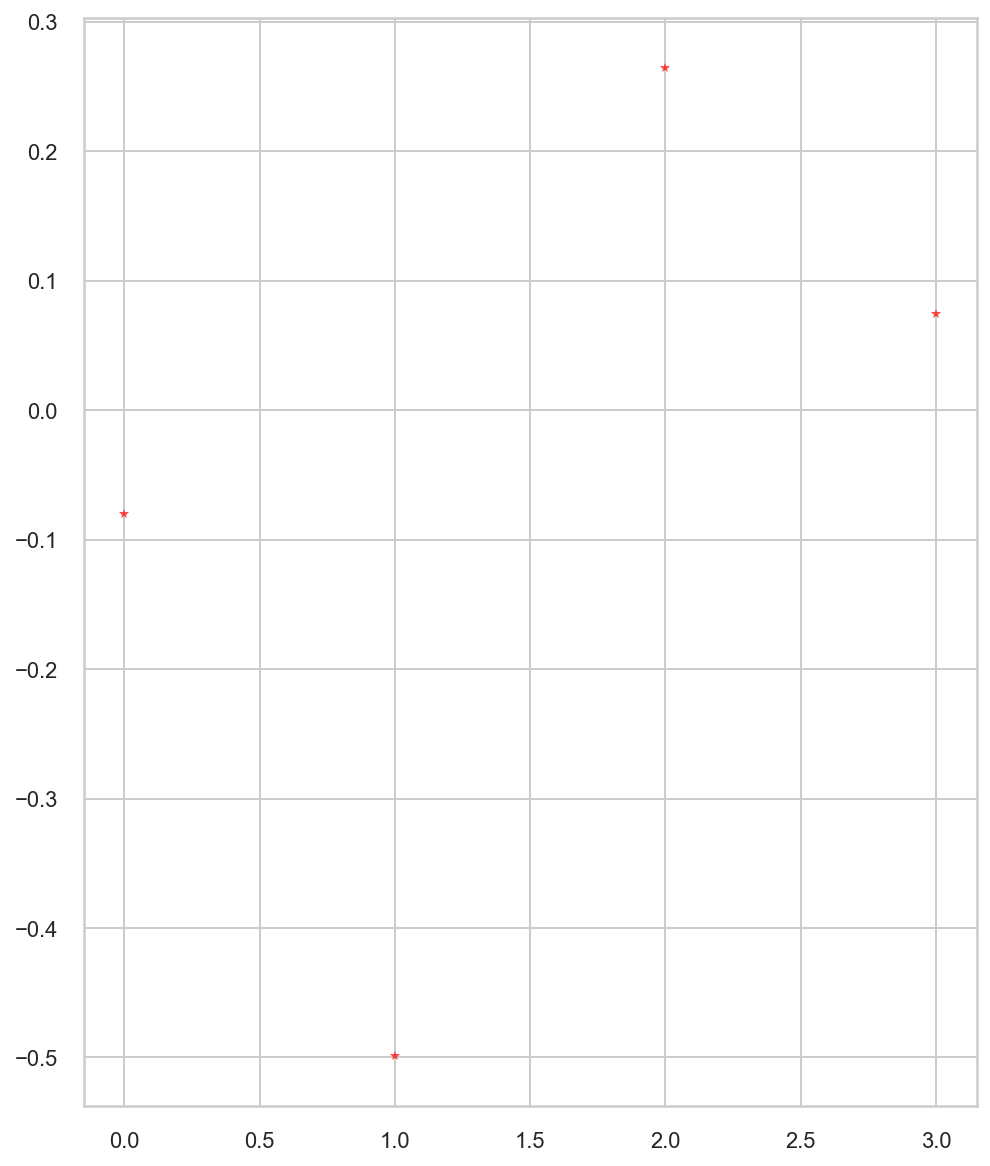

In [74]:
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) # zorder for ordering the markers

In [75]:
rr = Ridge(alpha=100)   #alpha=100 high alpha

rr.fit(xtrain_scaled, ytrain)
Ridge_train_score = rr.score(xtrain_scaled, ytrain)
Ridge_test_score = rr.score(xtest_scaled, ytest)

print(Ridge_train_score)
print(Ridge_test_score)  

0.8403050254435044
0.8605955417928131


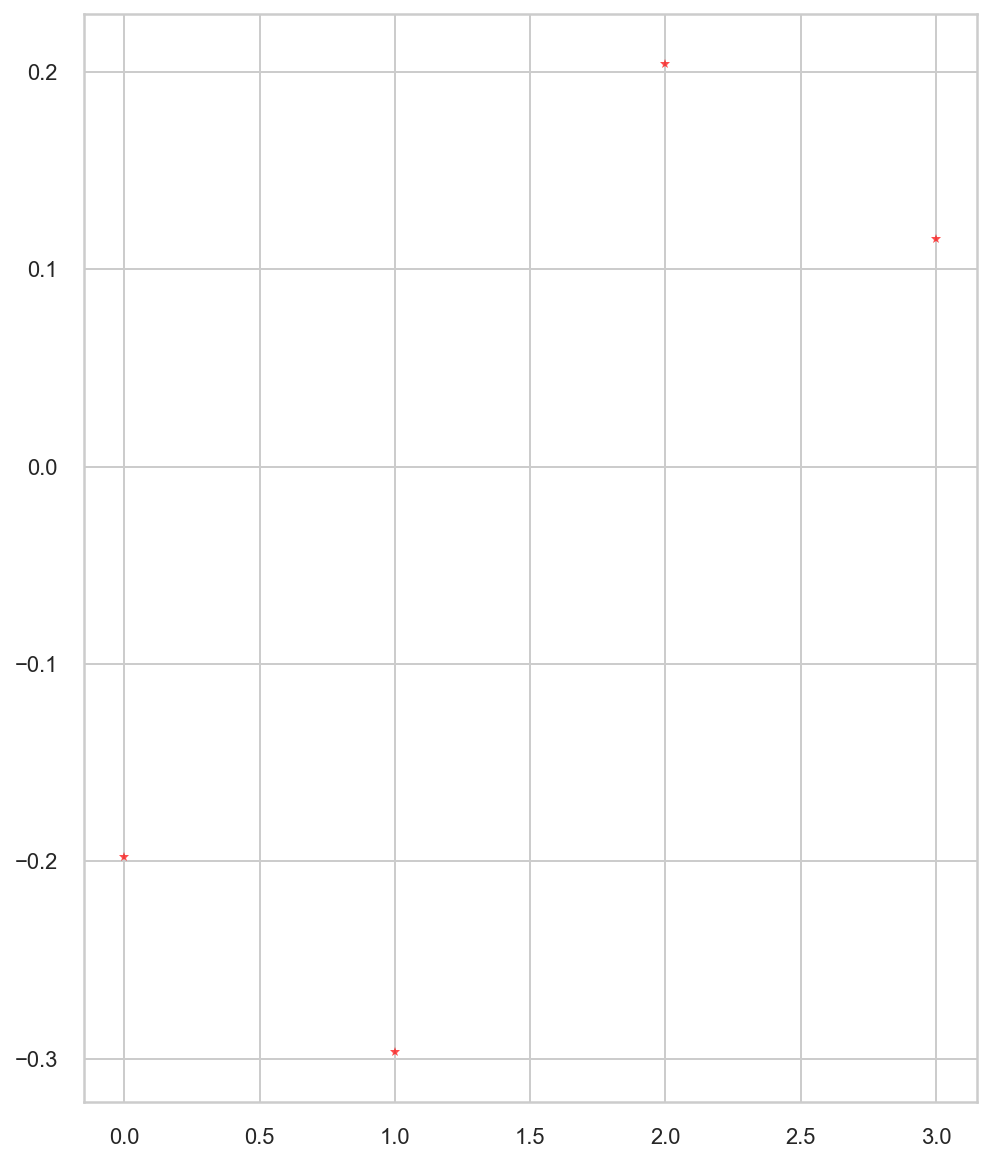

In [76]:
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) 
# zorder for ordering the markers
#rr coefficients for low alpha

In [77]:
#parameter tuning
from sklearn.model_selection import GridSearchCV
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(xtrain_scaled, ytrain) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.3s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [78]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.001596,0.000798,0.000997,2.431402e-07,0.0001,{'alpha': 0.0001},-0.194271,-0.240806,-0.241717,-0.228818,...,-0.228035,0.017600,16,-0.233616,-0.220732,-0.222514,-0.226204,-0.223397,-0.225293,0.004522
1,0.001795,0.000399,0.000200,3.990173e-04,0.001,{'alpha': 0.001},-0.194271,-0.240806,-0.241717,-0.228817,...,-0.228034,0.017600,15,-0.233616,-0.220732,-0.222514,-0.226204,-0.223397,-0.225293,0.004522
2,0.001396,0.000488,0.000798,3.988810e-04,0.01,{'alpha': 0.01},-0.194271,-0.240804,-0.241717,-0.228813,...,-0.228034,0.017600,14,-0.233615,-0.220731,-0.222515,-0.226204,-0.223397,-0.225292,0.004521
3,0.001802,0.000404,0.000199,3.989220e-04,0.05,{'alpha': 0.05},-0.194271,-0.240797,-0.241714,-0.228794,...,-0.228031,0.017599,13,-0.233610,-0.220729,-0.222519,-0.226204,-0.223396,-0.225292,0.004519
4,0.001596,0.000489,0.000589,4.808525e-04,0.1,{'alpha': 0.1},-0.194272,-0.240789,-0.241710,-0.228771,...,-0.228026,0.017598,12,-0.233604,-0.220726,-0.222525,-0.226204,-0.223395,-0.225291,0.004517


In [79]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
print(cv_results)


    mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_alpha  \
0        0.001596  7.982970e-04         0.000997    2.431402e-07            0   
1        0.001795  3.990656e-04         0.000200    3.990173e-04            0   
2        0.001396  4.879797e-04         0.000798    3.988810e-04            0   
3        0.001802  4.035973e-04         0.000199    3.989220e-04            0   
4        0.001596  4.886690e-04         0.000589    4.808525e-04            0   
5        0.001399  4.993966e-04         0.000601    4.908536e-04            0   
6        0.001788  3.964040e-04         0.000607    4.954870e-04            0   
7        0.001002  2.810080e-05         0.000995    2.077008e-05            0   
8        0.001196  3.997475e-04         0.000996    2.497826e-06            0   
9        0.001196  3.947513e-04         0.000991    1.650463e-05            0   
10       0.001398  4.866224e-04         0.000798    3.991904e-04            0   
11       0.000997  4.422006e

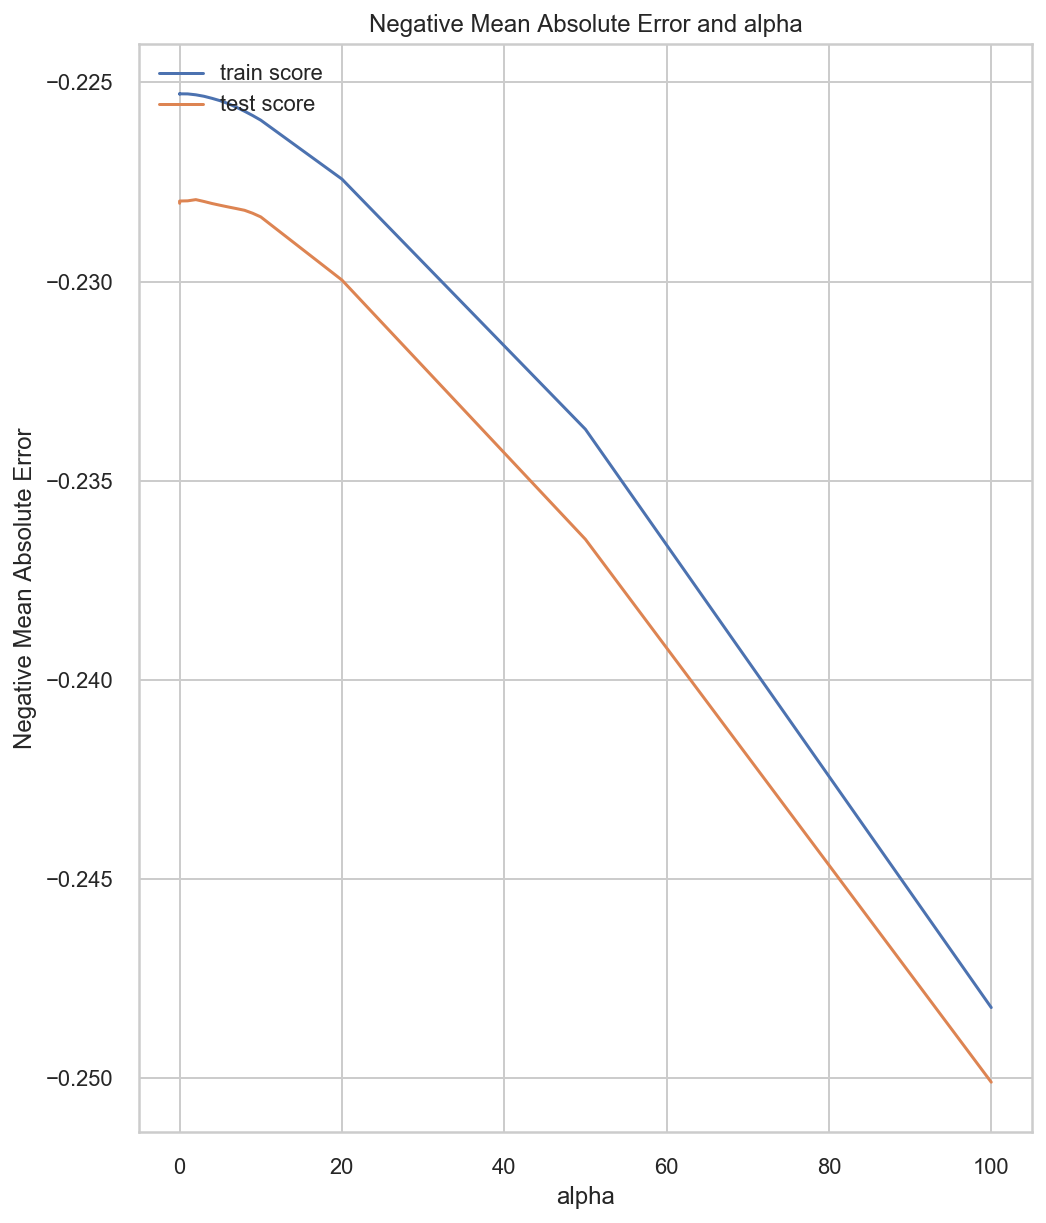

In [80]:
# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

# lasso = for higher number of variables we shall use lasso generally

In [81]:
from sklearn.linear_model import Lasso

In [82]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(xtrain_scaled, ytrain) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [83]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003802,0.002718,0.002184,0.000760,0.0001,{'alpha': 0.0001},-0.194279,-0.240777,-0.241732,-0.228783,...,-0.228030,0.017596,3,-0.233609,-0.220733,-0.222511,-0.226200,-0.223398,-0.225290,0.004519
1,0.001802,0.000405,0.000589,0.000481,0.001,{'alpha': 0.001},-0.194316,-0.240545,-0.241841,-0.228470,...,-0.227966,0.017569,2,-0.233521,-0.220725,-0.222435,-0.226121,-0.223379,-0.225236,0.004496
2,0.001404,0.000497,0.000989,0.000012,0.01,{'alpha': 0.01},-0.196047,-0.238249,-0.242924,-0.226058,...,-0.227796,0.016886,1,-0.233019,-0.220945,-0.221984,-0.225559,-0.223220,-0.224946,0.004320
3,0.000983,0.000019,0.001003,0.000025,0.05,{'alpha': 0.05},-0.205800,-0.231635,-0.250029,-0.221676,...,-0.231259,0.016490,4,-0.235486,-0.227002,-0.225691,-0.230447,-0.226695,-0.229064,0.003589
4,0.000997,0.000022,0.000996,0.000021,0.1,{'alpha': 0.1},-0.230031,-0.238089,-0.271012,-0.226335,...,-0.247482,0.020032,5,-0.250484,-0.244720,-0.242976,-0.248225,-0.242156,-0.245712,0.003169


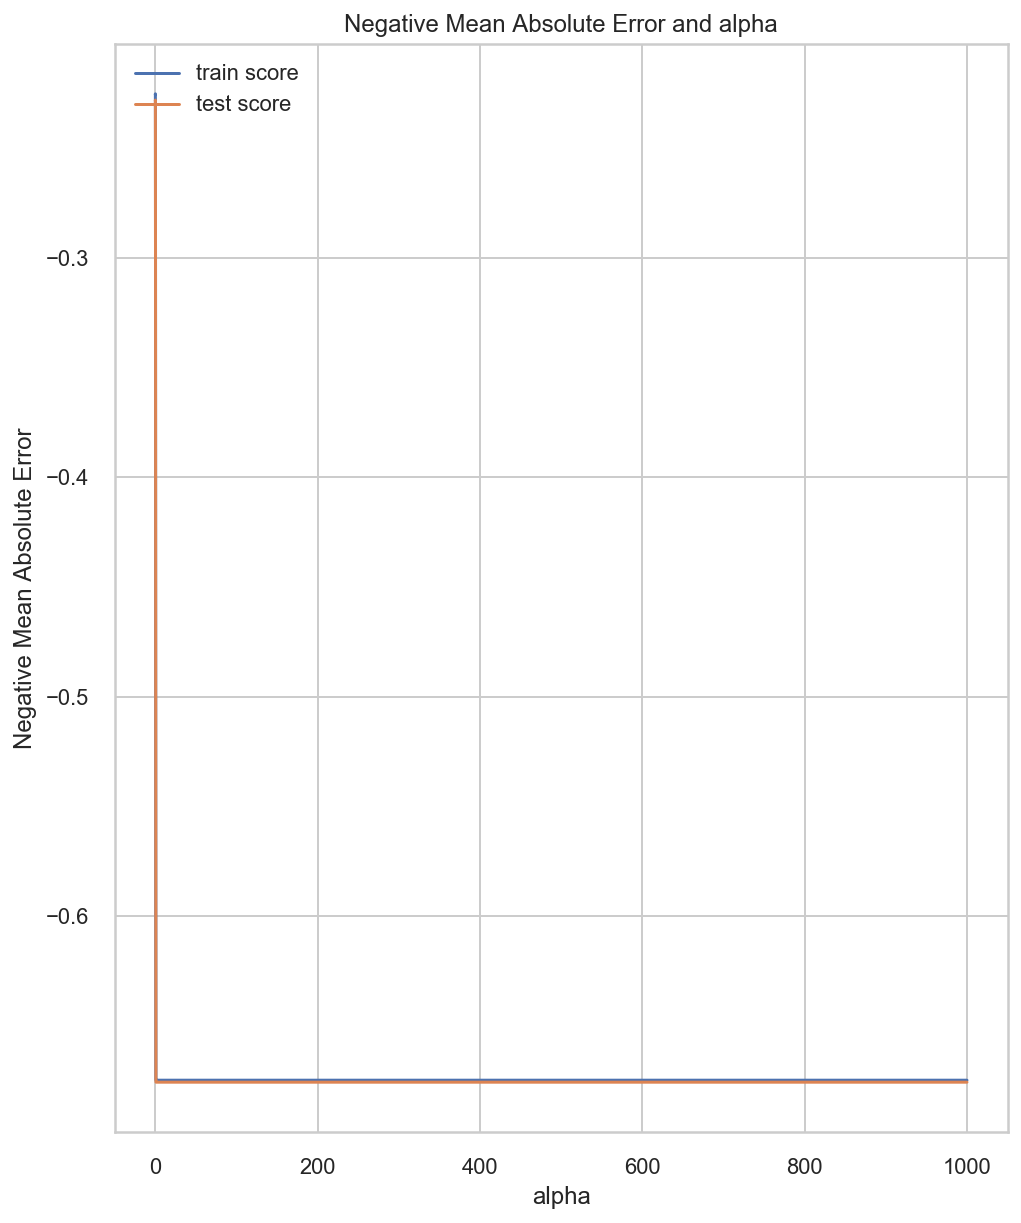

In [84]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [85]:
alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(xtrain_scaled, ytrain) 

Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [86]:
lasso.coef_

array([-0., -0.,  0.,  0.])

In [87]:
lasso = Lasso()
lasso.fit(xtrain_scaled,ytrain)
train_score=lasso.score(xtrain_scaled,ytrain)
test_score=lasso.score(xtest_scaled,ytest)
coeff_used = np.sum(lasso.coef_!=0)
print(train_score)
print(test_score)
print("number of features used will be ",coeff_used)

0.0
-0.004113667211316008
number of features used will be  0


In [88]:
lasso = Lasso(alpha=0.01, max_iter=10e5)  #low alpha
lasso.fit(xtrain_scaled,ytrain)
train_score=lasso.score(xtrain_scaled,ytrain)
test_score=lasso.score(xtest_scaled,ytest)
coeff_used = np.sum(lasso.coef_!=0)
print(train_score)
print(test_score)
print("number of features used will be ",coeff_used)


0.8617690344026595
0.8861201736486275
number of features used will be  4


In [89]:
lasso = Lasso(alpha=0.001, max_iter=10e5)  #even lower alpha
lasso.fit(xtrain_scaled,ytrain)
train_score=lasso.score(xtrain_scaled,ytrain)
test_score=lasso.score(xtest_scaled,ytest)
coeff_used = np.sum(lasso.coef_!=0)
print(train_score)
print(test_score)
print("number of features used will be ",coeff_used)  #closest r score values to linear regression!

0.8620421016381978
0.8856971013410175
number of features used will be  4


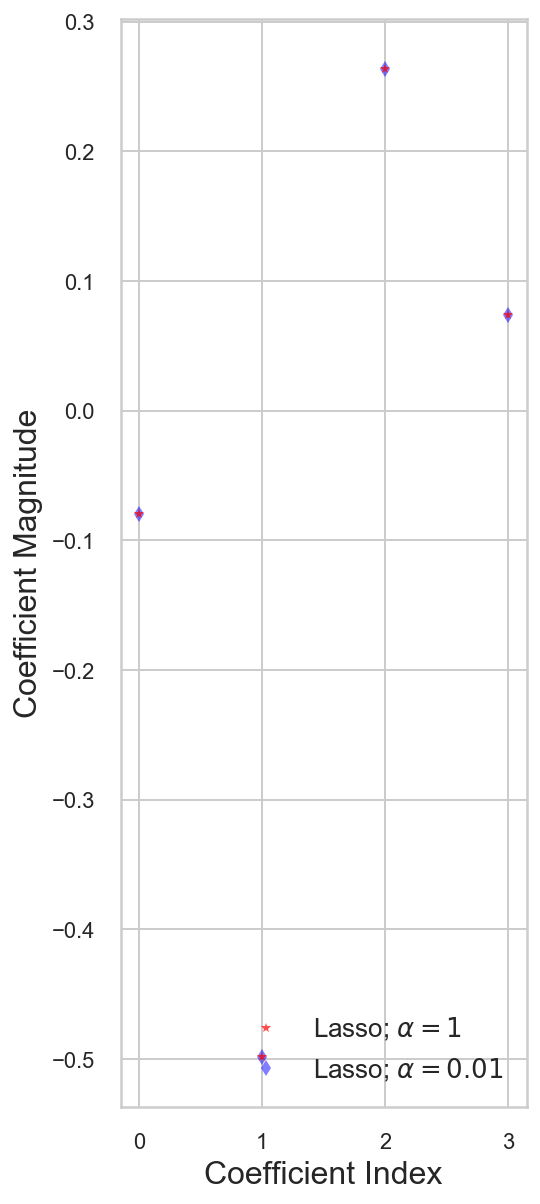

In [90]:
plt.subplot(1,2,1)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)

The default value of regularization parameter in Lasso regression (given by alpha) is 1. With this, out of x(total) features in our data-set, only 4 features are used (non zero value of the coefficient). Both training and test score (with only 4 features) are low; conclude that the model is under-fitting .

Reduce this under-fitting by reducing alpha and increasing number of iterations. Now alpha = 0.01, non-zero features =10, training and test score increases.

Comparison of coefficient magnitude for two different values of alpha are shown in the left panel of figure 2. For alpha =1, we can see most of the coefficients are zero or nearly zero, which is not the case for alpha=0.01. Further reduce alpha =0.0001, non-zero features = 22. Training and test scores are similar to basic linear regression case.

In the right panel of figure, for alpha = 0.0001, coefficients for Lasso regression and linear regression show close resemblance.

# elastic net

In [91]:
#elasic net--# Let's perform a cross-validation to find the best combination of alpha and l1_ratio
from sklearn.linear_model import ElasticNetCV, ElasticNet
from sklearn.metrics import r2_score

cv_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, .995, 1], eps=0.001, n_alphas=100, fit_intercept=True, 
                        normalize=True, precompute='auto', max_iter=2000, tol=0.0001, cv=5, 
                        copy_X=True, verbose=0, n_jobs=-1, positive=False, random_state=None, selection='cyclic')

In [92]:
cv_model.fit(xtrain_scaled, ytrain)

ElasticNetCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
             l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 0.995, 1], max_iter=2000,
             n_alphas=100, n_jobs=-1, normalize=True, positive=False,
             precompute='auto', random_state=None, selection='cyclic',
             tol=0.0001, verbose=0)

In [93]:
print('Optimal alpha: %.8f'%cv_model.alpha_)
print('Optimal l1_ratio: %.3f'%cv_model.l1_ratio_)
print('Number of iterations %d'%cv_model.n_iter_)

Optimal alpha: 0.00023811
Optimal l1_ratio: 1.000
Number of iterations 33


In [94]:
# train model with best parameters from CV
model = ElasticNet(l1_ratio=cv_model.l1_ratio_, alpha = cv_model.alpha_, max_iter=cv_model.n_iter_, fit_intercept=True, normalize = True)
model.fit(xtrain_scaled, ytrain)

ElasticNet(alpha=0.00023811265694850985, copy_X=True, fit_intercept=True,
           l1_ratio=1.0, max_iter=33, normalize=True, positive=False,
           precompute=False, random_state=None, selection='cyclic', tol=0.0001,
           warm_start=False)

In [95]:
print(r2_score(ytrain, model.predict(xtrain_scaled))) # training data performance

0.8619953219788401


In [96]:
print(r2_score(ytest, model.predict(xtest_scaled))) # test data performance

0.885900254223565
